### Monthly provisional counts of deaths by age group and HHS region for select causes of death

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint

In [2]:
file= pd.read_csv("death_by_disease.csv")

In [3]:
death_cause= pd.DataFrame(file)
death_cause

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
death_updated=death_cause.drop(columns=['flag_allcause','flag_natcause','flag_sept','flag_neopl',
                                        'flag_diab','flag_alz','flag_inflpn','flag_clrd','flag_otherresp',
                                        'flag_nephr','flag_otherunk','flag_hd','flag_stroke','flag_cov19mcod',
                                        'flag_cov19ucod'])
death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate,Note
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,27.0,NaN,217.0,34.0,NaN,0.0,0.0,4/23/2021,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,11.0,14.0,NaN,38.0,71.0,18.0,0.0,0.0,4/23/2021,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4/23/2021,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,55.0,18.0,NaN,70.0,171.0,37.0,42.0,35.0,4/23/2021,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021,NaN


In [5]:
death_updated[death_updated["Note"].str.contains("Data are provisional, and values in the most recent months are incomplete.")==False]
death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate,Note
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,27.0,NaN,217.0,34.0,NaN,0.0,0.0,4/23/2021,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,11.0,14.0,NaN,38.0,71.0,18.0,0.0,0.0,4/23/2021,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4/23/2021,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,55.0,18.0,NaN,70.0,171.0,37.0,42.0,35.0,4/23/2021,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021,NaN


In [6]:
death_updated["Note"].nunique()

1

In [7]:
del death_updated['Note']
death_updated.fillna(0, inplace =True)
death_updated.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,0.0,0.0,31.0,0.0,27.0,0.0,217.0,34.0,0.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,123.0,31.0,0.0,18.0,11.0,14.0,0.0,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021


In [8]:
dict = {'Septicemia (A40-A41)': 'Septicemia',
        'Malignant neoplasms (C00-C97)': 'Malignant_neoplasms',
        'Diabetes mellitus (E10-E14)': 'Diabetes_mellitus',
        'Alzheimer disease (G30)': 'Alzheimer_disease',
        'Influenza and pneumonia (J09-J18)': 'Influenza_pneumonia',
        'Chronic lower respiratory diseases (J40-J47)': 'Chronic_lower_respiratory_diseases',
        'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)': 'Other_diseases_of_respiratory_system',
        'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)': 'Nephritis',
        'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)':'Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
        'Diseases of heart (I00-I09,I11,I13,I20-I51)':'Diseases_of_heart',
        'Cerebrovascular diseases (I60-I69)':'Cerebrovascular_diseases',
        'COVID-19 (U071, Multiple Cause of Death)':'COVID-19_Multiple_Cause_of_Death',
        'COVID-19 (U071, Underlying Cause of Death)':'COVID-19_Underlying_Cause_of_Death',
        'AnalysisDate':'AnalysisDate'
       }

death_updated.rename(columns=dict,
          inplace=True)

death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Influenza_pneumonia,Chronic_lower_respiratory_diseases,Other_diseases_of_respiratory_system,Nephritis,Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Diseases_of_heart,Cerebrovascular_diseases,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death,AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,0.0,0.0,31.0,0.0,27.0,0.0,217.0,34.0,0.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,123.0,31.0,0.0,18.0,11.0,14.0,0.0,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4/23/2021
2966,2021,3,10,55-64 years,1182.0,1100.0,0.0,357.0,38.0,0.0,0.0,55.0,18.0,0.0,70.0,171.0,37.0,42.0,35.0,4/23/2021
2967,2021,3,10,65-74 years,1984.0,1895.0,0.0,608.0,87.0,30.0,12.0,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,19.0,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021


In [9]:
US_death_total_2019=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]

In [10]:
US_death_total_2019=US_death_total_2019.loc[US_death_total_2019['Date Of Death Year'] == 2019]

In [11]:
US_death_total_2019.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Influenza_pneumonia,Chronic_lower_respiratory_diseases,Other_diseases_of_respiratory_system,Nephritis,Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Diseases_of_heart,Cerebrovascular_diseases,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death,AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,0.0,0.0,31.0,0.0,27.0,0.0,217.0,34.0,0.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,123.0,31.0,0.0,18.0,11.0,14.0,0.0,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021


In [12]:
US_death_total_2020=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]

In [13]:
US_death_total_2020=US_death_total_2020.loc[US_death_total_2020['Date Of Death Year'] == 2020]

In [14]:
US_death_total_2020.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Influenza_pneumonia,Chronic_lower_respiratory_diseases,Other_diseases_of_respiratory_system,Nephritis,Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Diseases_of_heart,Cerebrovascular_diseases,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death,AnalysisDate
120,2020,1,United States,0-4 years,2095.0,1876.0,23.0,33.0,0.0,0.0,57.0,0.0,22.0,0.0,239.0,39.0,14.0,0.0,0.0,4/23/2021
121,2020,1,United States,15-24 years,2595.0,648.0,11.0,114.0,29.0,0.0,40.0,10.0,12.0,0.0,41.0,84.0,12.0,0.0,0.0,4/23/2021
122,2020,1,United States,25-34 years,5215.0,1906.0,32.0,323.0,81.0,0.0,119.0,31.0,21.0,25.0,100.0,329.0,65.0,0.0,0.0,4/23/2021
123,2020,1,United States,35-44 years,7584.0,4363.0,86.0,930.0,254.0,0.0,197.0,70.0,55.0,59.0,88.0,973.0,171.0,0.0,0.0,4/23/2021
124,2020,1,United States,45-54 years,14421.0,11440.0,204.0,3039.0,591.0,0.0,360.0,302.0,137.0,200.0,181.0,2738.0,496.0,0.0,0.0,4/23/2021


In [15]:
US_death_total_2021=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]
US_death_total_2021=US_death_total_2021.loc[US_death_total_2021['Date Of Death Year'] == 2021]
US_death_total_2021.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Influenza_pneumonia,Chronic_lower_respiratory_diseases,Other_diseases_of_respiratory_system,Nephritis,Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Diseases_of_heart,Cerebrovascular_diseases,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death,AnalysisDate
240,2021,1,United States,0-4 years,1701.0,1554.0,17.0,31.0,0.0,0.0,0.0,0.0,18.0,0.0,307.0,17.0,10.0,10.0,0.0,4/23/2021
241,2021,1,United States,15-24 years,2915.0,954.0,0.0,101.0,22.0,0.0,0.0,11.0,12.0,0.0,369.0,76.0,11.0,122.0,99.0,4/23/2021
242,2021,1,United States,25-34 years,6425.0,3054.0,37.0,288.0,98.0,0.0,26.0,29.0,21.0,26.0,833.0,297.0,54.0,615.0,536.0,4/23/2021
243,2021,1,United States,35-44 years,9994.0,6999.0,78.0,906.0,276.0,0.0,86.0,62.0,59.0,86.0,1086.0,985.0,163.0,1556.0,1423.0,4/23/2021
244,2021,1,United States,45-54 years,19037.0,16368.0,206.0,2811.0,667.0,0.0,160.0,242.0,132.0,235.0,1091.0,2750.0,503.0,4531.0,4229.0,4/23/2021


In [16]:
death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Influenza_pneumonia,Chronic_lower_respiratory_diseases,Other_diseases_of_respiratory_system,Nephritis,Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Diseases_of_heart,Cerebrovascular_diseases,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death,AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,0.0,0.0,31.0,0.0,27.0,0.0,217.0,34.0,0.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,123.0,31.0,0.0,18.0,11.0,14.0,0.0,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4/23/2021
2966,2021,3,10,55-64 years,1182.0,1100.0,0.0,357.0,38.0,0.0,0.0,55.0,18.0,0.0,70.0,171.0,37.0,42.0,35.0,4/23/2021
2967,2021,3,10,65-74 years,1984.0,1895.0,0.0,608.0,87.0,30.0,12.0,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,19.0,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021


In [17]:
HHS1_death_total=death_updated[death_updated["HHSRegion"].str.contains("1")==True]
HHS1_death_total = HHS1_death_total[HHS1_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS1_death_total_2=HHS1_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]
#Add "Date Of Death Year", "Date Of Death Month" if you want to divide it up later above

HHS1_death_ages_grouped = HHS1_death_total_2.groupby(["AgeGroup"])
HHS1_death_ages_sum_multiple = HHS1_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS1_death_ages_sum_underlying = HHS1_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS1_death_ages_sum_m_and_u = HHS1_death_ages_sum_multiple + HHS1_death_ages_sum_underlying


HHS1_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS1_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS1_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS1_death_ages_sum_m_and_u
                              })
HHS1_death_total_ages_final
HHS1_death_total_df=HHS1_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS1_death_total_df

HHS1_death_total_df2 = HHS1_death_total_df.copy()
HHS1_death_total_df2.reset_index(inplace=True)
HHS1_death_total_df2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
HHS1_death_total_df2.sort_values(by='ordering', inplace=True)
HHS1_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS1_death_total_df2.set_index('index', inplace=True)
HHS1_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
index,,,,
0,0-4 years,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0
2,15-24 years,0.0,0.0,0.0
3,25-34 years,35.0,32.0,67.0
4,35-44 years,181.0,150.0,331.0
5,45-54 years,649.0,578.0,1227.0
6,55-64 years,2125.0,1930.0,4055.0
7,65-74 years,4642.0,4259.0,8901.0
8,75-84 years,7357.0,6677.0,14034.0


In [18]:
HHS2_death_total=death_updated[death_updated["HHSRegion"].str.contains("2")==True]
HHS2_death_total = HHS2_death_total[HHS2_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS2_death_total_2=HHS2_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]
#Add "Date Of Death Year", "Date Of Death Month" if you want to divide it up later above

HHS2_death_ages_grouped = HHS2_death_total_2.groupby(["AgeGroup"])
HHS2_death_ages_sum_multiple = HHS2_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS2_death_ages_sum_underlying = HHS2_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS2_death_ages_sum_m_and_u = HHS2_death_ages_sum_multiple + HHS2_death_ages_sum_underlying


HHS2_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS2_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS2_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS2_death_ages_sum_m_and_u
                              })
HHS2_death_total_ages_final
HHS2_death_total_df=HHS1_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS2_death_total_df

HHS2_death_total_df2 = HHS2_death_total_df.copy()
HHS2_death_total_df2.reset_index(inplace=True)
HHS2_death_total_df2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
HHS2_death_total_df2.sort_values(by='ordering', inplace=True)
HHS2_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS2_death_total_df2.set_index('index', inplace=True)
HHS2_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
index,,,,
0,0-4 years,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0
2,15-24 years,0.0,0.0,0.0
3,25-34 years,35.0,32.0,67.0
4,35-44 years,181.0,150.0,331.0
5,45-54 years,649.0,578.0,1227.0
6,55-64 years,2125.0,1930.0,4055.0
7,65-74 years,4642.0,4259.0,8901.0
8,75-84 years,7357.0,6677.0,14034.0


In [19]:
HHS3_death_total=death_updated[death_updated["HHSRegion"].str.contains("3")==True]
HHS3_death_total = HHS3_death_total[HHS3_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS3_death_total_2=HHS3_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]
#Add "Date Of Death Year", "Date Of Death Month" if you want to divide it up later above

HHS3_death_ages_grouped = HHS3_death_total_2.groupby(["AgeGroup"])
HHS3_death_ages_sum_multiple = HHS3_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS3_death_ages_sum_underlying = HHS3_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS3_death_ages_sum_m_and_u = HHS3_death_ages_sum_multiple + HHS3_death_ages_sum_underlying


HHS3_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS3_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS3_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS3_death_ages_sum_m_and_u
                              })
HHS3_death_total_ages_final
HHS3_death_total_df=HHS3_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS3_death_total_df

HHS3_death_total_df2 = HHS3_death_total_df.copy()
HHS3_death_total_df2.reset_index(inplace=True)
HHS3_death_total_df2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
HHS3_death_total_df2.sort_values(by='ordering', inplace=True)
HHS3_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS3_death_total_df2.set_index('index', inplace=True)
HHS3_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
index,,,,
0,0-4 years,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0
2,15-24 years,0.0,0.0,0.0
3,25-34 years,137.0,114.0,251.0
4,35-44 years,384.0,345.0,729.0
5,45-54 years,1222.0,1128.0,2350.0
6,55-64 years,3358.0,3092.0,6450.0
7,65-74 years,6753.0,6273.0,13026.0
8,75-84 years,9607.0,8788.0,18395.0


In [20]:
HHS4_death_total=death_updated[death_updated["HHSRegion"].str.contains("4")==True]
HHS4_death_total = HHS4_death_total[HHS4_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS4_death_total_2=HHS4_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS4_death_ages_grouped = HHS4_death_total_2.groupby(["AgeGroup"])
HHS4_death_ages_sum_multiple = HHS4_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS4_death_ages_sum_underlying = HHS4_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS4_death_ages_sum_m_and_u = HHS4_death_ages_sum_multiple + HHS4_death_ages_sum_underlying


HHS4_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS4_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS4_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS4_death_ages_sum_m_and_u
                              })

HHS4_death_total_df2 = HHS4_death_total_df.copy()
HHS4_death_total_df2.reset_index(inplace=True)
HHS4_death_total_df2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
HHS4_death_total_df2.sort_values(by='ordering', inplace=True)
HHS4_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS4_death_total_df2.set_index('index', inplace=True)
HHS4_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
index,,,,
0,0-4 years,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0
2,15-24 years,87.0,64.0,151.0
3,25-34 years,454.0,411.0,865.0
4,35-44 years,1220.0,1099.0,2319.0
5,45-54 years,3262.0,2979.0,6241.0
6,55-64 years,8607.0,7894.0,16501.0
7,65-74 years,16286.0,15074.0,31360.0
8,75-84 years,20498.0,18690.0,39188.0


In [21]:
HHS5_death_total=death_updated[death_updated["HHSRegion"].str.contains("5")==True]
HHS5_death_total = HHS5_death_total[HHS5_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS5_death_total_2=HHS5_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS5_death_ages_grouped = HHS5_death_total_2.groupby(["AgeGroup"])
HHS5_death_ages_sum_multiple = HHS5_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS5_death_ages_sum_underlying = HHS5_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS5_death_ages_sum_m_and_u = HHS5_death_ages_sum_multiple + HHS5_death_ages_sum_underlying


HHS5_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS5_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS5_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS5_death_ages_sum_m_and_u
                              })

HHS5_death_total_df2 = HHS5_death_total_df.copy()
HHS5_death_total_df2.reset_index(inplace=True)
HHS5_death_total_df2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
HHS5_death_total_df2.sort_values(by='ordering', inplace=True)
HHS5_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS5_death_total_df2.set_index('index', inplace=True)
HHS5_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
index,,,,
0,0-4 years,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0
2,15-24 years,28.0,26.0,54.0
3,25-34 years,297.0,260.0,557.0
4,35-44 years,770.0,692.0,1462.0
5,45-54 years,2251.0,2079.0,4330.0
6,55-64 years,6257.0,5744.0,12001.0
7,65-74 years,13171.0,12095.0,25266.0
8,75-84 years,18726.0,16904.0,35630.0


In [22]:
HHS5_death_total=death_updated[death_updated["HHSRegion"].str.contains("5")==True]
HHS5_death_total = HHS5_death_total[HHS5_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS5_death_total_2=HHS5_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS5_death_ages_grouped = HHS5_death_total_2.groupby(["AgeGroup"])
HHS5_death_ages_sum_multiple = HHS5_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS5_death_ages_sum_underlying = HHS5_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS5_death_ages_sum_m_and_u = HHS5_death_ages_sum_multiple + HHS5_death_ages_sum_underlying


HHS5_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS5_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS5_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS5_death_ages_sum_m_and_u
                              })

HHS5_death_total_df2 = HHS5_death_total_df.copy()
HHS5_death_total_df2.reset_index(inplace=True)
HHS5_death_total_df2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
HHS5_death_total_df2.sort_values(by='ordering', inplace=True)
HHS5_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS5_death_total_df2.set_index('index', inplace=True)
HHS5_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
index,,,,
0,0-4 years,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0
2,15-24 years,28.0,26.0,54.0
3,25-34 years,297.0,260.0,557.0
4,35-44 years,770.0,692.0,1462.0
5,45-54 years,2251.0,2079.0,4330.0
6,55-64 years,6257.0,5744.0,12001.0
7,65-74 years,13171.0,12095.0,25266.0
8,75-84 years,18726.0,16904.0,35630.0


In [23]:
HHS6_death_total=death_updated[death_updated["HHSRegion"].str.contains("6")==True]
HHS6_death_total = HHS6_death_total[HHS6_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS6_death_total_2=HHS6_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS6_death_ages_grouped = HHS6_death_total_2.groupby(["AgeGroup"])
HHS6_death_ages_sum_multiple = HHS6_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS6_death_ages_sum_underlying = HHS6_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS6_death_ages_sum_m_and_u = HHS6_death_ages_sum_multiple + HHS6_death_ages_sum_underlying


HHS6_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS6_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS6_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS6_death_ages_sum_m_and_u
                              })

HHS6_death_total_df2 = HHS6_death_total_df.copy()
HHS6_death_total_df2.reset_index(inplace=True)
HHS6_death_total_df2['ordering'] = [0, 2, 3, 4, 6, 1, 6, 7, 8, 9]
HHS6_death_total_df2.sort_values(by='ordering', inplace=True)
HHS6_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS6_death_total_df2.set_index('index', inplace=True)
HHS6_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
index,,,,
0,0-4 years,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0
2,15-24 years,69.0,64.0,133.0
3,25-34 years,515.0,460.0,975.0
4,35-44 years,1357.0,1242.0,2599.0
6,45-54 years,3486.0,3281.0,6767.0
6,55-64 years,7780.0,7291.0,15071.0
7,65-74 years,12620.0,11837.0,24457.0
8,75-84 years,14113.0,13059.0,27172.0


In [24]:
HHS7_death_total=death_updated[death_updated["HHSRegion"].str.contains("7")==True]
HHS7_death_total = HHS7_death_total[HHS7_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS7_death_total_2=HHS7_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS7_death_ages_grouped = HHS7_death_total_2.groupby(["AgeGroup"])
HHS7_death_ages_sum_multiple = HHS7_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS7_death_ages_sum_underlying = HHS7_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS7_death_ages_sum_m_and_u = HHS7_death_ages_sum_multiple + HHS7_death_ages_sum_underlying


HHS7_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS7_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS7_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS7_death_ages_sum_m_and_u
                              })

HHS7_death_total_df2 = HHS7_death_total_df.copy()
HHS7_death_total_df2.reset_index(inplace=True)
HHS7_death_total_df2['ordering'] = [0, 2, 3, 4, 7, 1, 7, 7, 8, 9]
HHS7_death_total_df2.sort_values(by='ordering', inplace=True)
HHS7_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS7_death_total_df2.set_index('index', inplace=True)
HHS7_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
index,,,,
0,0-4 years,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0
2,15-24 years,0.0,0.0,0.0
3,25-34 years,43.0,27.0,70.0
4,35-44 years,170.0,138.0,308.0
7,45-54 years,558.0,523.0,1081.0
7,55-64 years,1675.0,1546.0,3221.0
7,65-74 years,3491.0,3210.0,6701.0
8,75-84 years,5291.0,4828.0,10119.0


In [25]:
HHS8_death_total=death_updated[death_updated["HHSRegion"].str.contains("8")==True]
HHS8_death_total = HHS8_death_total[HHS8_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS8_death_total_2=HHS8_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS8_death_ages_grouped = HHS8_death_total_2.groupby(["AgeGroup"])
HHS8_death_ages_sum_multiple = HHS8_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS8_death_ages_sum_underlying = HHS8_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS8_death_ages_sum_m_and_u = HHS8_death_ages_sum_multiple + HHS8_death_ages_sum_underlying


HHS8_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS8_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS8_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS8_death_ages_sum_m_and_u
                              })

HHS8_death_total_df2 = HHS8_death_total_df.copy()
HHS8_death_total_df2.reset_index(inplace=True)
HHS8_death_total_df2['ordering'] = [0, 2, 3, 4, 8, 1, 8, 8, 8, 9]
HHS8_death_total_df2.sort_values(by='ordering', inplace=True)
HHS8_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS8_death_total_df2.set_index('index', inplace=True)
HHS8_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
index,,,,
0,0-4 years,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0
2,15-24 years,0.0,0.0,0.0
3,25-34 years,51.0,48.0,99.0
4,35-44 years,167.0,133.0,300.0
8,45-54 years,481.0,414.0,895.0
8,55-64 years,1109.0,998.0,2107.0
8,65-74 years,2305.0,2098.0,4403.0
8,75-84 years,3255.0,2923.0,6178.0


In [26]:
HHS9_death_total=death_updated[death_updated["HHSRegion"].str.contains("9")==True]
HHS9_death_total = HHS9_death_total[HHS9_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS9_death_total_2=HHS9_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS9_death_ages_grouped = HHS9_death_total_2.groupby(["AgeGroup"])
HHS9_death_ages_sum_multiple = HHS9_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS9_death_ages_sum_underlying = HHS9_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS9_death_ages_sum_m_and_u = HHS9_death_ages_sum_multiple + HHS9_death_ages_sum_underlying


HHS9_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS9_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS9_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS9_death_ages_sum_m_and_u
                              })

HHS9_death_total_df2 = HHS9_death_total_df.copy()
HHS9_death_total_df2.reset_index(inplace=True)
HHS9_death_total_df2['ordering'] = [0, 2, 3, 4, 9, 1, 9, 9, 9, 9]
HHS9_death_total_df2.sort_values(by='ordering', inplace=True)
HHS9_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS9_death_total_df2.set_index('index', inplace=True)
HHS9_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
index,,,,
0,0-4 years,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0
2,15-24 years,109.0,74.0,183.0
3,25-34 years,502.0,441.0,943.0
4,35-44 years,1293.0,1200.0,2493.0
9,45-54 years,3207.0,3041.0,6248.0
9,55-64 years,6846.0,6488.0,13334.0
9,65-74 years,10347.0,9814.0,20161.0
9,75-84 years,11883.0,11063.0,22946.0


In [27]:
HHS10_death_total=death_updated[death_updated["HHSRegion"].str.contains("10")==True]
HHS10_death_total = HHS10_death_total[HHS10_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS10_death_total_2=HHS10_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS10_death_ages_grouped = HHS10_death_total_2.groupby(["AgeGroup"])
HHS10_death_ages_sum_multiple = HHS10_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS10_death_ages_sum_underlying = HHS10_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS10_death_ages_sum_m_and_u = HHS10_death_ages_sum_multiple + HHS10_death_ages_sum_underlying


HHS10_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS10_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS10_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS10_death_ages_sum_m_and_u
                              })

HHS10_death_total_df2 = HHS10_death_total_df.copy()
HHS10_death_total_df2.reset_index(inplace=True)
HHS10_death_total_df2['ordering'] = [0, 2, 3, 4, 10, 1, 10, 10, 10, 10]
HHS10_death_total_df2.sort_values(by='ordering', inplace=True)
HHS10_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS10_death_total_df2.set_index('index', inplace=True)
HHS10_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Total COVID-19 Deaths
index,,,,
0,0-4 years,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0
2,15-24 years,0.0,0.0,0.0
3,25-34 years,0.0,0.0,0.0
4,35-44 years,80.0,62.0,142.0
10,45-54 years,242.0,216.0,458.0
10,55-64 years,692.0,623.0,1315.0
10,65-74 years,1410.0,1264.0,2674.0
10,75-84 years,2017.0,1792.0,3809.0


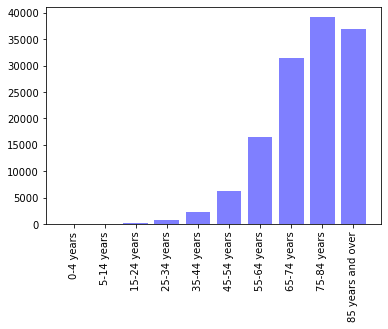

In [28]:
x_axis = np.arange(len(HHS4_death_total_df2))
y_axis=HHS4_death_total_df2["Total COVID-19 Deaths"]
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["0-4 years", "5-14 years","15-24 years", "25-34 years", "35-44 years", "45-54 years","55-64 years","65-74 years","75-84 years","85 years and over"], rotation="vertical")
plt.show()


In [29]:
death_2019=US_death_total_2019[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_2019_totals=death_2019.sum()
death_analysis_2019_df = pd.DataFrame({"Disease Death Count": death_2019_totals})
death_analysis_2019_df =death_analysis_2019_df .sort_values('Disease Death Count',ascending=False)
death_analysis_2019_df 

,Disease Death Count
Diseases_of_heart,660877.0
Malignant_neoplasms,600488.0
Chronic_lower_respiratory_diseases,157044.0
Cerebrovascular_diseases,150206.0
Alzheimer_disease,121486.0
Diabetes_mellitus,87777.0
Nephritis,51489.0
Influenza_pneumonia,49864.0
Other_diseases_of_respiratory_system,44095.0
Septicemia,38404.0


In [30]:
death_2020=US_death_total_2020[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_2020_totals=death_2020.sum()
death_analysis_2020_df = pd.DataFrame({"Disease Death Count": death_2020_totals})
death_analysis_2020_df =death_analysis_2020_df .sort_values('Disease Death Count',ascending=False)
death_analysis_2020_df 

,Disease Death Count
Diseases_of_heart,695277.0
Malignant_neoplasms,601188.0
COVID-19_Multiple_Cause_of_Death,382576.0
COVID-19_Underlying_Cause_of_Death,349375.0
Cerebrovascular_diseases,159738.0
Chronic_lower_respiratory_diseases,152160.0
Alzheimer_disease,133685.0
Diabetes_mellitus,101687.0
Influenza_pneumonia,53630.0
Nephritis,52336.0


In [31]:
death_2021=US_death_total_2021[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_2021_totals=death_2021.sum()
death_analysis_2021_df = pd.DataFrame({"Disease Death Count": death_2021_totals})
death_analysis_2021_df =death_analysis_2021_df .sort_values('Disease Death Count',ascending=False)
death_analysis_2021_df 

,Disease Death Count
COVID-19_Multiple_Cause_of_Death,165208.0
Diseases_of_heart,161577.0
COVID-19_Underlying_Cause_of_Death,148555.0
Malignant_neoplasms,138006.0
Cerebrovascular_diseases,38901.0
Chronic_lower_respiratory_diseases,32368.0
Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,31872.0
Alzheimer_disease,30495.0
Diabetes_mellitus,24384.0
Nephritis,13053.0


In [32]:
HHS1_death_total_2020=HHS1_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS1_totals=HHS1_death_total_2020.sum()
death_analysis_HHS1_df = pd.DataFrame({"Disease Death Count for HHS1 in 2020": death_HHS1_totals})
death_analysis_HHS1_df =death_analysis_HHS1_df.sort_values('Disease Death Count for HHS1 in 2020',ascending=False)
death_analysis_HHS1_df

,Disease Death Count for HHS1 in 2020
Malignant_neoplasms,53824.0
Diseases_of_heart,51924.0
COVID-19_Multiple_Cause_of_Death,26616.0
COVID-19_Underlying_Cause_of_Death,24113.0
Cerebrovascular_diseases,11740.0
Chronic_lower_respiratory_diseases,11628.0
Alzheimer_disease,11166.0
Diabetes_mellitus,7589.0
Influenza_pneumonia,3642.0
Other_diseases_of_respiratory_system,3499.0


In [33]:
HHS2_death_total_2020=HHS2_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS2_totals=HHS2_death_total_2020.sum()
death_analysis_HHS2_df = pd.DataFrame({"Disease Death Count for HHS2 in 2020": death_HHS2_totals})
death_analysis_HHS2_df =death_analysis_HHS2_df.sort_values('Disease Death Count for HHS2 in 2020',ascending=False)


In [34]:
HHS3_death_total_2020=HHS3_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS3_totals=HHS3_death_total_2020.sum()
death_analysis_HHS3_df = pd.DataFrame({"Disease Death Count for HHS3 in 2020": death_HHS3_totals})
death_analysis_HHS3_df =death_analysis_HHS3_df.sort_values('Disease Death Count for HHS3 in 2020',ascending=False)


In [35]:
HHS4_death_total_2020=HHS4_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS4_totals=HHS4_death_total_2020.sum()
death_analysis_HHS4_df = pd.DataFrame({"Disease Death Count for HHS4 in 2020": death_HHS4_totals})
death_analysis_HHS4_df =death_analysis_HHS4_df.sort_values('Disease Death Count for HHS4 in 2020',ascending=False)


In [36]:
HHS5_death_total_2020=HHS5_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS5_totals=HHS5_death_total_2020.sum()
death_analysis_HHS5_df = pd.DataFrame({"Disease Death Count for HHS5 in 2020": death_HHS5_totals})
death_analysis_HHS5_df =death_analysis_HHS5_df.sort_values('Disease Death Count for HHS5 in 2020',ascending=False)


In [37]:
HHS6_death_total_2020=HHS6_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS6_totals=HHS6_death_total_2020.sum()
death_analysis_HHS6_df = pd.DataFrame({"Disease Death Count for HHS6 in 2020": death_HHS6_totals})
death_analysis_HHS6_df =death_analysis_HHS6_df.sort_values('Disease Death Count for HHS6 in 2020',ascending=False)


In [38]:
HHS7_death_total_2020=HHS7_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS7_totals=HHS7_death_total_2020.sum()
death_analysis_HHS7_df = pd.DataFrame({"Disease Death Count for HHS7 in 2020": death_HHS7_totals})
death_analysis_HHS7_df =death_analysis_HHS7_df.sort_values('Disease Death Count for HHS7 in 2020',ascending=False)

In [39]:
HHS8_death_total_2020=HHS8_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS8_totals=HHS8_death_total_2020.sum()
death_analysis_HHS8_df = pd.DataFrame({"Disease Death Count for HHS8 in 2020": death_HHS8_totals})
death_analysis_HHS8_df =death_analysis_HHS8_df.sort_values('Disease Death Count for HHS8 in 2020',ascending=False)

In [40]:
HHS9_death_total_2020=HHS9_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS9_totals=HHS9_death_total_2020.sum()
death_analysis_HHS9_df = pd.DataFrame({"Disease Death Count for HHS9 in 2020": death_HHS9_totals})
death_analysis_HHS9_df =death_analysis_HHS9_df.sort_values('Disease Death Count for HHS9 in 2020',ascending=False)

In [41]:
HHS10_death_total_2020=HHS10_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS10_totals=HHS10_death_total_2020.sum()
death_analysis_HHS10_df = pd.DataFrame({"Disease Death Count for HHS10 in 2020": death_HHS10_totals})
death_analysis_HHS10_df =death_analysis_HHS10_df.sort_values('Disease Death Count for HHS10 in 2020',ascending=False)

In [50]:
HHS_regions_deaths = pd.DataFrame({
                                "HHS1": death_HHS1_totals, 
                                "HHS2": death_HHS2_totals,
                                "HHS3": death_HHS3_totals,
                                "HHS4": death_HHS4_totals,
                                "HHS5": death_HHS5_totals,
                                "HHS6": death_HHS6_totals,
                                "HHS7": death_HHS7_totals,
                                "HHS8": death_HHS8_totals,
                                "HHS9": death_HHS9_totals,
                                "HHS10": death_HHS10_totals
                              })

HHS_regions_deaths

,HHS1,HHS2,HHS3,HHS4,HHS5,HHS6,HHS7,HHS8,HHS9,HHS10
Septicemia,2621.0,3803.0,4629.0,10160.0,7028.0,5644.0,1757.0,919.0,2386.0,959.0
Malignant_neoplasms,53824.0,48156.0,61961.0,134632.0,104460.0,69918.0,28406.0,17972.0,80809.0,24952.0
Diabetes_mellitus,7589.0,7736.0,10031.0,22624.0,16685.0,13420.0,4420.0,2908.0,15424.0,3963.0
Alzheimer_disease,11166.0,6421.0,9870.0,29326.0,23473.0,18691.0,6071.0,4753.0,23538.0,6530.0
Influenza_pneumonia,3642.0,6266.0,5052.0,11689.0,8439.0,5883.0,2431.0,1088.0,7795.0,1279.0
Chronic_lower_respiratory_diseases,11628.0,9402.0,13694.0,37868.0,27301.0,19124.0,8194.0,5205.0,18540.0,5618.0
Other_diseases_of_respiratory_system,3499.0,4895.0,4391.0,10700.0,7085.0,5061.0,2579.0,1261.0,4271.0,1438.0
Nephritis,3129.0,4187.0,6035.0,12049.0,9433.0,7003.0,2848.0,1118.0,5625.0,890.0
Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,2649.0,4564.0,4233.0,10625.0,6074.0,3391.0,1552.0,514.0,4307.0,1350.0
Diseases_of_heart,51924.0,67563.0,69741.0,154221.0,120215.0,87096.0,33243.0,19355.0,90987.0,23414.0
